In [1]:
import pandas                 as pd
import seaborn                as sns
import matplotlib.pyplot      as plt

from sklearn.linear_model    import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics         import r2_score

In [2]:
df = pd.read_excel('4dd_Teste_Técnico_Pleno_CMI_Daiane.xlsx', sheet_name = 'Reestruturada')

In [3]:
df.columns

Index(['Nº respondent.', 'Mês da pesquisa', 'Marca',
       'O quão disposto você estaria a recomendar? (Em uma escala de 0 à 10)',
       'É uma marca que todos falam bem',
       'Relaciono os produtos dessa marca com hábitos saudáveis',
       'Eu entento os valores da marca',
       'É uma marca com preocupação ambiental',
       'Tem uma variedade de produtos que combinam com minha pele',
       'As promoções são atrativas', 'Os produtos são de qualidade',
       'Melhora o rendimento das revendedoras',
       'É uma marca que me oferece brindes e benefícios',
       'É uma marca mais barata que as outras da mesma categoria',
       'É uma marca focada no consumidor', 'É amigável',
       'Tem um bom custo benefício',
       'Consigo perceber a tecnologia do produto', 'É uma marca profissional',
       'Tenho confiança na marca', 'Torna a minha vida mais prática',
       'Conversa com a minha auto estima',
       'É uma marca de comunicação divertida', 'Oferece sempre novidades',


In [4]:
df.dtypes

Nº respondent.                                                                   int64
Mês da pesquisa                                                         datetime64[ns]
Marca                                                                           object
O quão disposto você estaria a recomendar? (Em uma escala de 0 à 10)             int64
É uma marca que todos falam bem                                                 object
Relaciono os produtos dessa marca com hábitos saudáveis                         object
Eu entento os valores da marca                                                  object
É uma marca com preocupação ambiental                                           object
Tem uma variedade de produtos que combinam com minha pele                       object
As promoções são atrativas                                                      object
Os produtos são de qualidade                                                    object
Melhora o rendimento das revendedoras      

In [5]:
#extraindo o mês e ano da coluna 'Mês da pesquisa'
df['Mês da pesquisa'] = df['Mês da pesquisa'].dt.strftime('%Y-%m')

In [6]:
#criando uma coluna demarcando "1" para cada respondente para facilitar os códigos com groupby
df['qtde_respondentes'] = 1

In [7]:
numero_pessoas_consultadas = df[['Marca', 'Mês da pesquisa']].value_counts()
numero_pessoas_consultadas

Marca  Mês da pesquisa
A      2022-04            1119
B      2022-04            1119
A      2022-03            1065
B      2022-03            1065
dtype: int64

In [8]:
#separando o df para as diferentes marcas
df_marca_A = df.loc[df['Marca'] == 'A']
df_marca_B = df.loc[df['Marca'] == 'B']

In [28]:
grau_recomendacao_marca_A = df_marca_A[['Marca','Mês da pesquisa','O quão disposto você estaria a recomendar? (Em uma escala de 0 à 10)',
                                                       'qtde_respondentes']].groupby(['Marca','Mês da pesquisa','O quão disposto você estaria a recomendar? (Em uma escala de 0 à 10)']).sum().reset_index()
grau_recomendacao_marca_B = df_marca_B[['Marca','Mês da pesquisa','O quão disposto você estaria a recomendar? (Em uma escala de 0 à 10)',
                                                        'qtde_respondentes']].groupby(['Marca','Mês da pesquisa','O quão disposto você estaria a recomendar? (Em uma escala de 0 à 10)']).sum().reset_index()

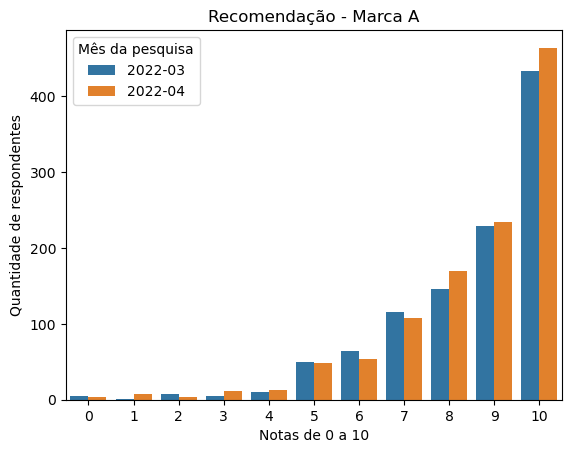

In [31]:
#plotando grafico para ver a distribuição dos graus de recomendação para a Marca B
sns.barplot(x='O quão disposto você estaria a recomendar? (Em uma escala de 0 à 10)', y='qtde_respondentes', 
            hue='Mês da pesquisa', data=grau_recomendacao_marca_A)
plt.title('Recomendação - Marca A')
plt.xlabel('Notas de 0 a 10')
plt.ylabel('Quantidade de respondentes')

plt.show()

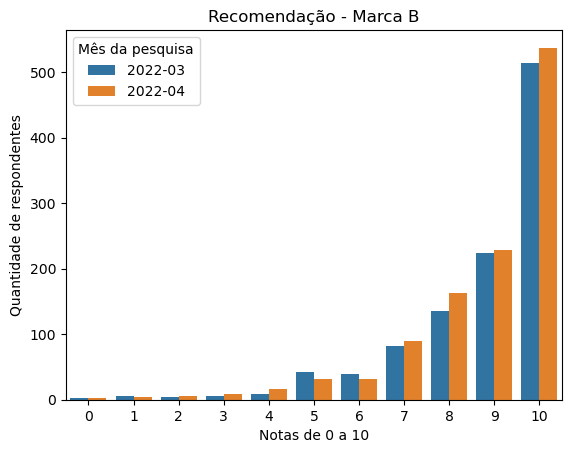

In [32]:
#plotando grafico para ver a distribuição dos graus de recomendação para a Marca B
sns.barplot(x='O quão disposto você estaria a recomendar? (Em uma escala de 0 à 10)', y='qtde_respondentes', 
            hue='Mês da pesquisa', data=grau_recomendacao_marca_B)
plt.title('Recomendação - Marca B')
plt.xlabel('Notas de 0 a 10')
plt.ylabel('Quantidade de respondentes')

plt.show()

1.Há associação ou não com as frases “conversa” de alguma forma com o grau de recomendação para as marcas A e B?

In [13]:
#calculando média e desvio padrão dos graus de recomendação em relação a variável'Conversa com a minha auto estima' - Marca A
media_marca_A = df_marca_A.groupby('Conversa com a minha auto estima')['O quão disposto você estaria a recomendar? (Em uma escala de 0 à 10)'].mean()
desvio_marca_A = df_marca_A.groupby('Conversa com a minha auto estima')['O quão disposto você estaria a recomendar? (Em uma escala de 0 à 10)'].std()

In [14]:
media_marca_A

Conversa com a minha auto estima
No     7.618768
Yes    8.925433
Name: O quão disposto você estaria a recomendar? (Em uma escala de 0 à 10), dtype: float64

In [16]:
desvio_marca_A

Conversa com a minha auto estima
No     2.125601
Yes    1.489839
Name: O quão disposto você estaria a recomendar? (Em uma escala de 0 à 10), dtype: float64

In [17]:
#calculando média e desvio padrão dos graus de recomendação em relação a variável'Conversa com a minha auto estima' - Marca B
media_marca_B = df_marca_B.groupby('Conversa com a minha auto estima')['O quão disposto você estaria a recomendar? (Em uma escala de 0 à 10)'].mean()
desvio_marca_B = df_marca_B.groupby('Conversa com a minha auto estima')['O quão disposto você estaria a recomendar? (Em uma escala de 0 à 10)'].std()

In [18]:
media_marca_B

Conversa com a minha auto estima
No     8.001866
Yes    9.020024
Name: O quão disposto você estaria a recomendar? (Em uma escala de 0 à 10), dtype: float64

In [19]:
desvio_marca_B

Conversa com a minha auto estima
No     2.132524
Yes    1.464069
Name: O quão disposto você estaria a recomendar? (Em uma escala de 0 à 10), dtype: float64

Text(0, 0.5, 'Grau de recomendação ')

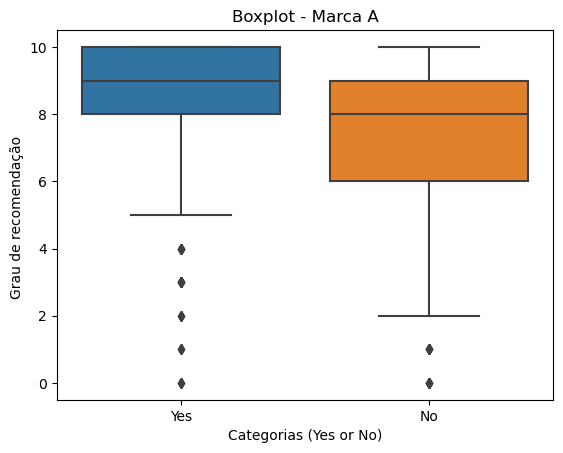

In [20]:
#plotando gráfico para analisar a correção entre o grau de recomendação e a variável'Conversa com a minha auto estima' - Marca A
boxplot_marca_A = sns.boxplot(x='Conversa com a minha auto estima', y='O quão disposto você estaria a recomendar? (Em uma escala de 0 à 10)', 
                              data = df_marca_A)
plt.title('Boxplot - Marca A')
plt.xlabel('Categorias (Yes or No)')
plt.ylabel('Grau de recomendação ')

Text(0, 0.5, 'Grau de recomendação ')

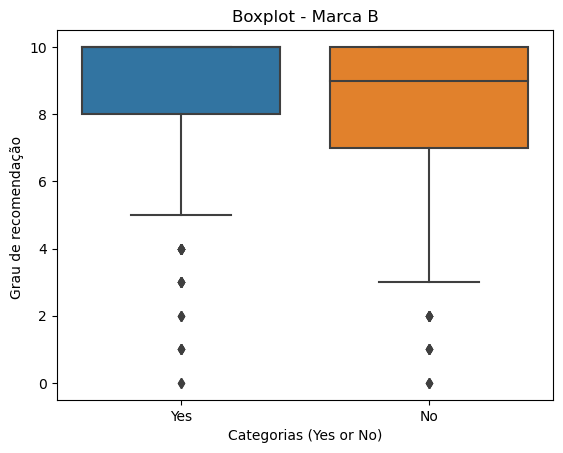

In [21]:
#plotando gráfico para analisar a correção entre o grau de recomendação e a variável'Conversa com a minha auto estima' - Marca B
ax = sns.boxplot(x='Conversa com a minha auto estima', y='O quão disposto você estaria a recomendar? (Em uma escala de 0 à 10)', 
                 data = df_marca_B)
plt.title('Boxplot - Marca B')
plt.xlabel('Categorias (Yes or No)')
plt.ylabel('Grau de recomendação ')

In [22]:
#transformando todos os "Yes" em 1 e "No" em 0 no df da Marca A
colunas = {'Marca','É uma marca que todos falam bem',
       'Relaciono os produtos dessa marca com hábitos saudáveis',
       'Eu entento os valores da marca',
       'É uma marca com preocupação ambiental',
       'Tem uma variedade de produtos que combinam com minha pele',
       'As promoções são atrativas', 'Os produtos são de qualidade',
       'Melhora o rendimento das revendedoras',
       'É uma marca que me oferece brindes e benefícios',
       'É uma marca mais barata que as outras da mesma categoria',
       'É uma marca focada no consumidor', 'É amigável',
       'Tem um bom custo benefício',
       'Consigo perceber a tecnologia do produto', 'É uma marca profissional',
       'Tenho confiança na marca', 'Torna a minha vida mais prática',
       'Conversa com a minha auto estima',
       'É uma marca de comunicação divertida', 'Oferece sempre novidades',
       'É a marca líder na categoria',
       'É uma marca que se preocupa com o usuário.'}


for coluna in colunas:
    df_marca_A[coluna] = df_marca_A[coluna].apply(lambda x: 1 if x == 'Yes' else 0)

C:\Users\daiane.carvalho\AppData\Local\Temp\ipykernel_5264\428106064.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_marca_A[coluna] = df_marca_A[coluna].apply(lambda x: 1 if x == 'Yes' else 0)


In [23]:
respostas_positivas_marca_A = df_marca_A[['Marca','qtde_respondentes','É uma marca que todos falam bem',
       'Relaciono os produtos dessa marca com hábitos saudáveis',
       'Eu entento os valores da marca',
       'É uma marca com preocupação ambiental',
       'Tem uma variedade de produtos que combinam com minha pele',
       'As promoções são atrativas', 'Os produtos são de qualidade',
       'Melhora o rendimento das revendedoras',
       'É uma marca que me oferece brindes e benefícios',
       'É uma marca mais barata que as outras da mesma categoria',
       'É uma marca focada no consumidor', 'É amigável',
       'Tem um bom custo benefício',
       'Consigo perceber a tecnologia do produto', 'É uma marca profissional',
       'Tenho confiança na marca', 'Torna a minha vida mais prática',
       'Conversa com a minha auto estima',
       'É uma marca de comunicação divertida', 'Oferece sempre novidades',
       'É a marca líder na categoria',
       'É uma marca que se preocupa com o usuário.']].groupby(['qtde_respondentes']).sum()

In [24]:
#aplicação do modelo regressão linear para calcular a correlação entre o grau de recomendação e a 'Conversa com a minha auto estima' - Marca A
X = df_marca_A[['O quão disposto você estaria a recomendar? (Em uma escala de 0 à 10)']] 
y = df_marca_A['Conversa com a minha auto estima']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#treinando o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Visualizar os coeficientes
coeficientes = model.coef_
intercept = model.intercept_
print("Coeficiente:", coeficientes)
print("Interceptação:", intercept)

# Calcular e visualizar o R² no conjunto de teste
r2 = model.score(X_test, y_test)
print("R²:", r2)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

Coeficiente: [0.08714067]
Interceptação: -0.05439637508819528
R²: 0.07395817555177808


In [25]:
#transformando todos os "Yes" em 1 e "No" em 0 no df da Marca B
colunas = {'Marca','É uma marca que todos falam bem',
       'Relaciono os produtos dessa marca com hábitos saudáveis',
       'Eu entento os valores da marca',
       'É uma marca com preocupação ambiental',
       'Tem uma variedade de produtos que combinam com minha pele',
       'As promoções são atrativas', 'Os produtos são de qualidade',
       'Melhora o rendimento das revendedoras',
       'É uma marca que me oferece brindes e benefícios',
       'É uma marca mais barata que as outras da mesma categoria',
       'É uma marca focada no consumidor', 'É amigável',
       'Tem um bom custo benefício',
       'Consigo perceber a tecnologia do produto', 'É uma marca profissional',
       'Tenho confiança na marca', 'Torna a minha vida mais prática',
       'Conversa com a minha auto estima',
       'É uma marca de comunicação divertida', 'Oferece sempre novidades',
       'É a marca líder na categoria',
       'É uma marca que se preocupa com o usuário.'}


for coluna in colunas:
    df_marca_B[coluna] = df_marca_B[coluna].apply(lambda x: 1 if x == 'Yes' else 0)

C:\Users\daiane.carvalho\AppData\Local\Temp\ipykernel_5264\2655434667.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_marca_B[coluna] = df_marca_B[coluna].apply(lambda x: 1 if x == 'Yes' else 0)


In [26]:
respostas_positivas_marca_B = df_marca_B[['Marca','qtde_respondentes','É uma marca que todos falam bem',
       'Relaciono os produtos dessa marca com hábitos saudáveis',
       'Eu entento os valores da marca',
       'É uma marca com preocupação ambiental',
       'Tem uma variedade de produtos que combinam com minha pele',
       'As promoções são atrativas', 'Os produtos são de qualidade',
       'Melhora o rendimento das revendedoras',
       'É uma marca que me oferece brindes e benefícios',
       'É uma marca mais barata que as outras da mesma categoria',
       'É uma marca focada no consumidor', 'É amigável',
       'Tem um bom custo benefício',
       'Consigo perceber a tecnologia do produto', 'É uma marca profissional',
       'Tenho confiança na marca', 'Torna a minha vida mais prática',
       'Conversa com a minha auto estima',
       'É uma marca de comunicação divertida', 'Oferece sempre novidades',
       'É a marca líder na categoria',
       'É uma marca que se preocupa com o usuário.']].groupby(['qtde_respondentes']).sum()

In [27]:
#aplicação do modelo regressão linear para calcular a correlação entre o grau de recomendação e a 'Conversa com a minha auto estima' - Marca B
X = df_marca_B[['O quão disposto você estaria a recomendar? (Em uma escala de 0 à 10)']] 
y = df_marca_B['Conversa com a minha auto estima']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#treinando o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Visualizar os coeficientes
coeficientes = model.coef_
intercept = model.intercept_
print("Coeficiente:", coeficientes)
print("Interceptação:", intercept)

# Calcular e visualizar o R² no conjunto de teste
r2 = model.score(X_test, y_test)
print("R²:", r2)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

Coeficiente: [0.06468729]
Interceptação: 0.18874489346938073
R²: 0.05566650869643874


##### A correlação entre o grau de recomendação e a variável "Conversa com a minha auto estima" é muito baixa, levando em consideração o conjunto de resultados obtidos com as médias, desvio padrão, gráficos e com a aplicação de regressão linear que confirmou uma correlação muito baixa entre as duas variáveis. Para a *Marca A* somente 7,3% do grau de recomendação estão relacionados com a variável "Conversa com a minha auto estima". Enquanto para a *Marca B* esse valor é ainda mais baixo, apenas 5,6%. Em resumo, pode ser considerado que o grau de recomendação tanto para a *Marca A* quanto para a *Marca B* não está relacionado á variável "Conversa com a minha auto estima".

3.Se não: Somos a Marca A. Temos uma verba para investir em comunicação e queremos trazer pessoas da Marca B? No que devemos investir considerando o que é fortaleza para eles e fraqueza para a gente?

In [33]:
#análise das quantidades de "Yes" para cada variável,afim de identificiar os pontos fracos e fortes da Marca A
respostas_positivas_marca_A.T

qtde_respondentes,1
Marca,0
É uma marca que todos falam bem,1226
Relaciono os produtos dessa marca com hábitos saudáveis,1384
Eu entento os valores da marca,1215
É uma marca com preocupação ambiental,1249
Tem uma variedade de produtos que combinam com minha pele,1449
As promoções são atrativas,1353
Os produtos são de qualidade,1426
Melhora o rendimento das revendedoras,1330
É uma marca que me oferece brindes e benefícios,1334


In [38]:
#análise das quantidades de "Yes" para cada variável,afim de identificiar os pontos fracos e fortes da Marca B
respostas_positivas_marca_B.T

qtde_respondentes,1
Marca,0
É uma marca que todos falam bem,1307
Relaciono os produtos dessa marca com hábitos saudáveis,1655
Eu entento os valores da marca,1238
É uma marca com preocupação ambiental,1254
Tem uma variedade de produtos que combinam com minha pele,1604
As promoções são atrativas,1103
Os produtos são de qualidade,1677
Melhora o rendimento das revendedoras,1274
É uma marca que me oferece brindes e benefícios,1552


##### Considerando que somos a Marca A e queremos atrair pessoas da Marca B, é importante investir na qualidade dos produtos, desenvolver ou trabalhar o marketing da marca com hábitos saudáveis e, diminuir a competição entre as concorrentes e se tornar líder na categoria dos produtos vendidos.